In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

載入資料

In [2]:
data = pd.read_csv(r'C:\Users\tsaih\Dropbox\人工智慧\期末\hiroshima_challengedata.csv')

尋找以夜晚使用app為主的網格

In [3]:
# 移除異常資料點
data = data[(data['x'] != 999)&(data['y'] != 999)]

#晚上人數大於白天的地點中總資料量最大的三個地點，以早上六點與晚上六點作為分界線
daytime = data[(data['t'] > 12)&(data['t'] <= 36)] #白天的資料
nighttime = data[(data['t'] <= 12)|(data['t'] > 36)] #晚上的資料

#計算各個網格的白天與晚上人數
daytime_counts = daytime.groupby(['x','y']).size().reset_index(name = 'daytime_count')
daytime_counts.fillna(0,inplace = True) #將缺失值填0
nighttime_counts = nighttime.groupby(['x','y']).size().reset_index(name = 'nighttime_count')
nighttime_counts.fillna(0,inplace = True)

#合併白天與晚上的人數
merge_dayandnight = pd.merge(daytime_counts,nighttime_counts,on=['x','y'],how='outer')
merge_dayandnight.fillna(0,inplace=True)

#計算晚上人數占全天人數比例，並過濾掉資料量較少者
merge_dayandnight['ratio']=merge_dayandnight['nighttime_count']/(merge_dayandnight['daytime_count']+merge_dayandnight['nighttime_count'])
ratio_diff=merge_dayandnight[(merge_dayandnight['daytime_count']+merge_dayandnight['nighttime_count'])>8000]

#找出晚上人數大於白天的地點中比例最大且資料量足夠的三個地點
top3_nightratio=ratio_diff.nlargest(3,'ratio')

print(top3_nightratio)

        x    y  daytime_count  nighttime_count     ratio
13039  87  118         3589.0           4983.0  0.581311
13174  88   89         4830.0           6230.0  0.563291
13888  92  159         5242.0           6355.0  0.547987


依照時間(總小時)來視覺化網格(87,118)

C:\Users\tsaih\AppData\Local\Temp\ipykernel_32352\2666006632.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['24hours'] = filtered_data['t']//2
C:\Users\tsaih\AppData\Local\Temp\ipykernel_32352\2666006632.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['hours'] = filtered_data['d']*24+filtered_data['24hours']


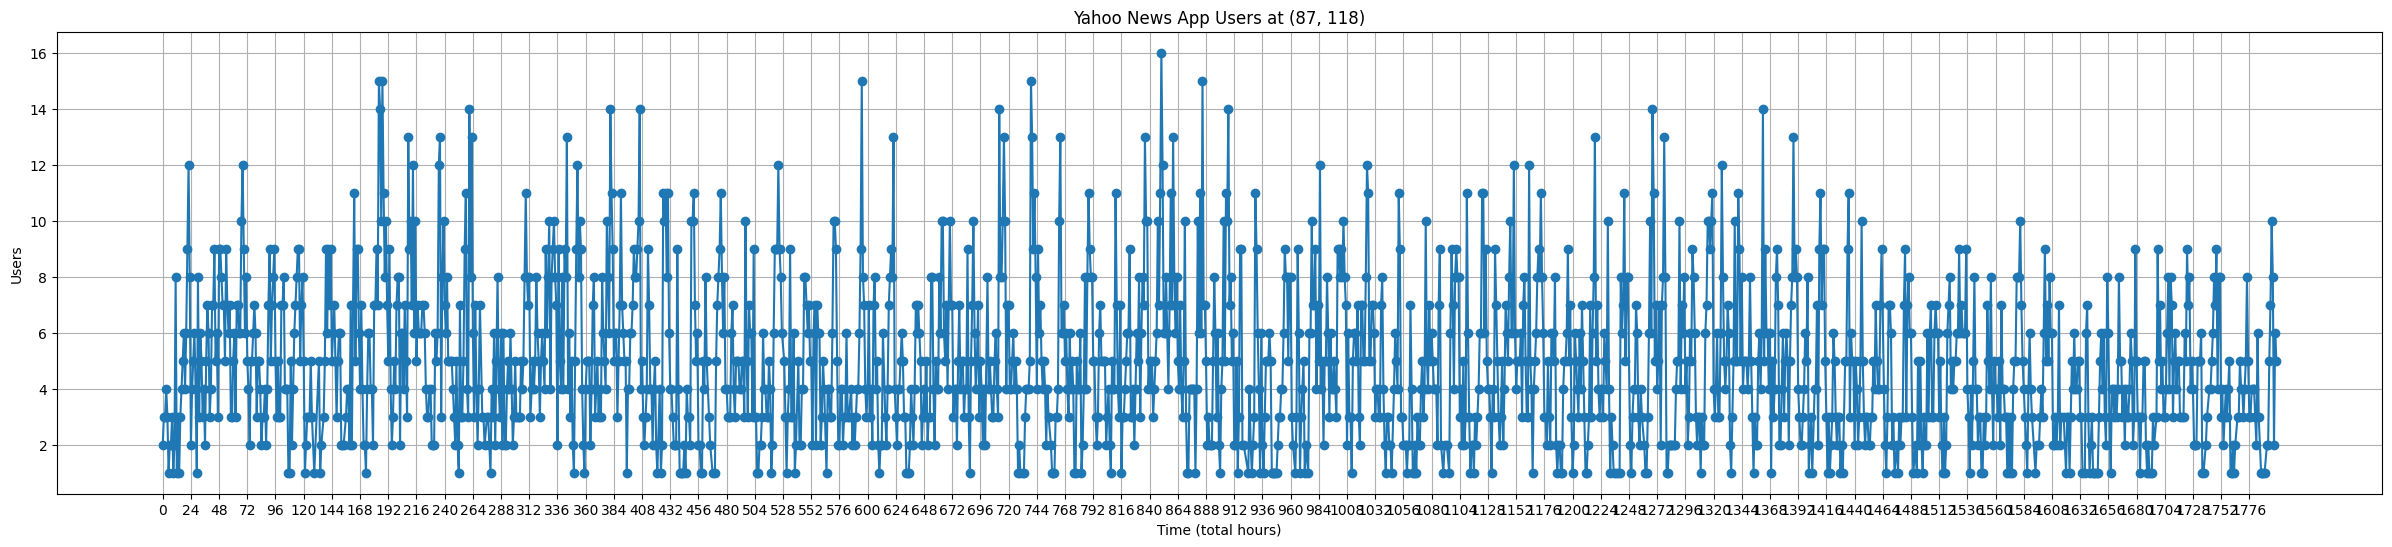

In [4]:
# 網格(87, 118)的資料
filtered_data = data[(data['x'] == 87) & (data['y'] == 118)]

# 將時間t轉換為小時
filtered_data['24hours'] = filtered_data['t']//2

#以總共75天的每個小時分類
filtered_data['hours'] = filtered_data['d']*24+filtered_data['24hours']

# 統計總共75天每個小時的人數
total_hourly_counts = filtered_data.groupby('hours').size().reset_index(name='count')

# 繪製總共75天時間與人流量的關係圖
plt.figure(figsize=(30,6))
plt.plot(total_hourly_counts['hours'], total_hourly_counts['count'], marker='o')
xticks = np.arange(0,total_hourly_counts['hours'].max(),24)  #每24個小時為一個刻度
plt.xticks(xticks)
plt.grid(True)
plt.title('Yahoo News App Users at (87, 118)')
plt.xlabel('Time (total hours)')
plt.ylabel('Users')
plt.show()

依照一天當中幾點來視覺化網格(87,118)的資料

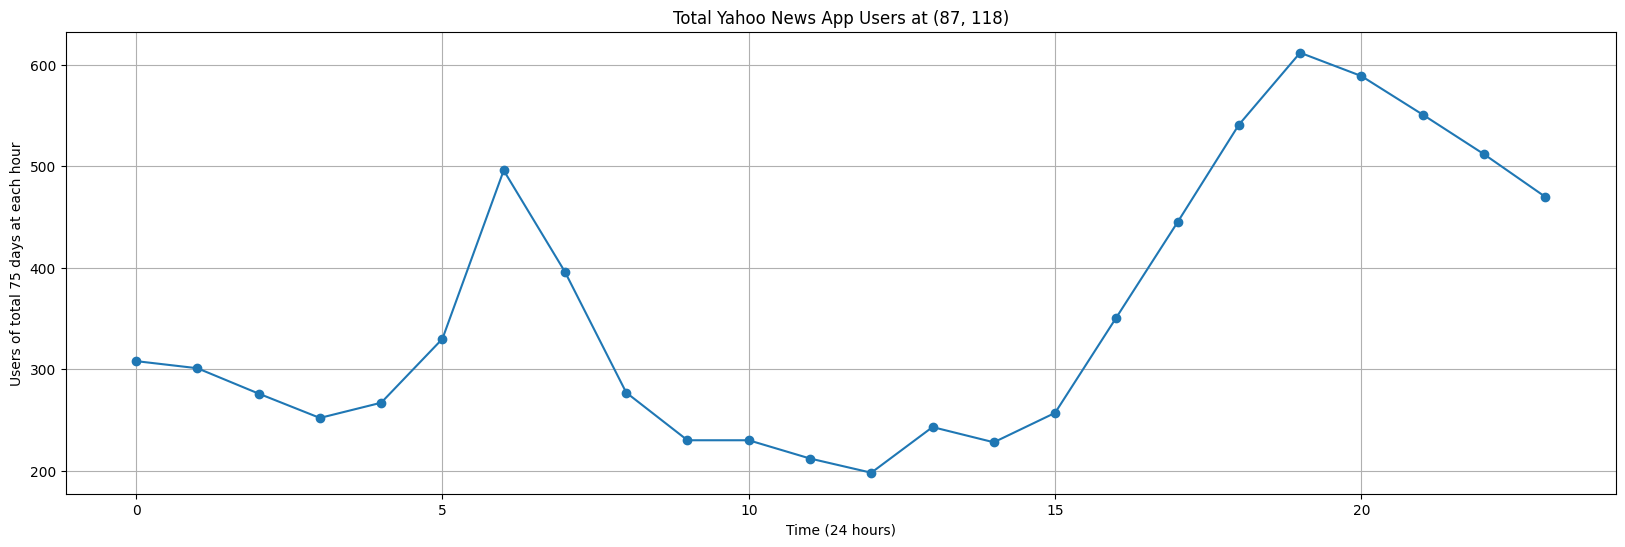

In [5]:
# 統計一天下來每個小時的人數
hour24_counts = filtered_data.groupby('24hours').size().reset_index(name='count')

# 繪製以24小時時間與人流量的關係圖
plt.figure(figsize=(20,6))
plt.plot(hour24_counts['24hours'], hour24_counts['count'], marker='o')
plt.grid(True)
plt.title('Total Yahoo News App Users at (87, 118)')
plt.xlabel('Time (24 hours)')
plt.ylabel('Users of total 75 days at each hour')
plt.show()

訓練DNN模型與驗證

C:\Users\tsaih\AppData\Local\Temp\ipykernel_32352\2272302884.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['hour'] = filtered_data['t']//2
C:\Users\tsaih\AppData\Local\Temp\ipykernel_32352\2272302884.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['weekday'] = filtered_data['d']%7
c:\Users\tsaih\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When us

Epoch 1/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0597 - mae: 0.1626 - val_loss: 0.0320 - val_mae: 0.1066
Epoch 2/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0439 - mae: 0.1391 - val_loss: 0.0315 - val_mae: 0.1151
Epoch 3/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0456 - mae: 0.1448 - val_loss: 0.0287 - val_mae: 0.1095
Epoch 4/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0416 - mae: 0.1401 - val_loss: 0.0289 - val_mae: 0.1136
Epoch 5/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0413 - mae: 0.1407 - val_loss: 0.0267 - val_mae: 0.1081
Epoch 6/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0428 - mae: 0.1418 - val_loss: 0.0263 - val_mae: 0.1094
Epoch 7/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0391 - mae: 0.1393 - val_loss: 0.0272 - val_mae: 0.1137
Epoch 8/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0385 - mae: 0.1386 - val_loss: 0.0245 - val_mae: 0.1062
Epoch 9/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.03

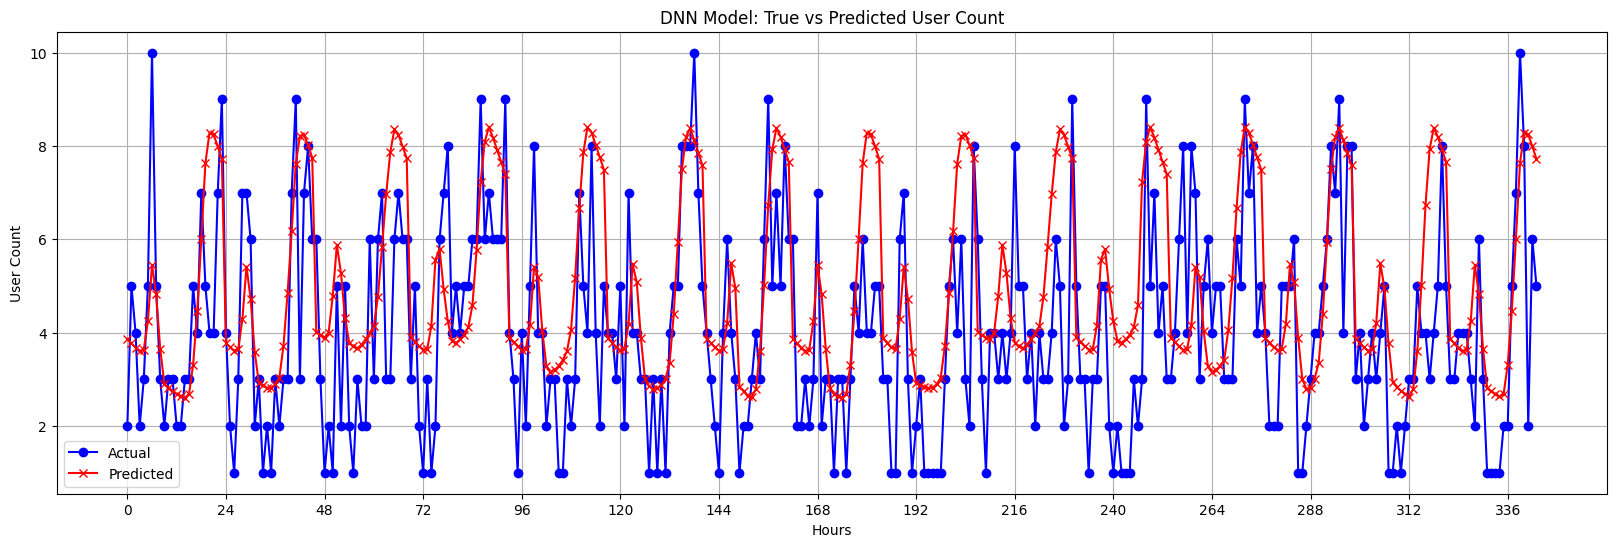

In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

#計算一天當中的第幾個小時
filtered_data['hour'] = filtered_data['t']//2

#計算星期幾
filtered_data['weekday'] = filtered_data['d']%7

#統計每個小時和每一天的流量數據
hour_counts = filtered_data.groupby(['d','weekday','hour']).size().reset_index(name='count')

#分割訓練集與驗證集
train_data = hour_counts[hour_counts['d'] < 60]
valid_data = hour_counts[hour_counts['d'] >= 60]

#整理訓練集和驗證集特徵
X_train = train_data[['weekday','hour']].values
y_train = train_data['count'].values.reshape(-1,1)
X_valid = valid_data[['weekday','hour']].values
y_valid = valid_data['count'].values.reshape(-1,1)

#標準化
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X_train_scaled = scaler_x.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train)
X_valid_scaled = scaler_x.transform(X_valid)
y_valid_scaled = scaler_y.transform(y_valid)

#建立類神經網絡模型
model = Sequential()
model.add(Dense(64,input_dim=2,activation='relu',kernel_regularizer=l2(0.0001))) #relu回歸問題 #L2正則化
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu',kernel_regularizer=l2(0.0001)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu',kernel_regularizer=l2(0.0001)))
model.add(Dense(1))

#編譯模型
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

#訓練模型
model_trained = model.fit(X_train_scaled,y_train_scaled,epochs=200,batch_size=32,validation_data=(X_valid_scaled, y_valid_scaled))

#預測驗證集
y_pred_scaled = model.predict(X_valid_scaled)
y_pred_rescaled = scaler_y.inverse_transform(y_pred_scaled)
y_val_rescaled = scaler_y.inverse_transform(y_valid_scaled)

#繪製圖表，x軸為總小時，y軸為總人數
plt.figure(figsize=(20,6))
plt.plot(y_val_rescaled,label='Actual',marker='o',color='b')
plt.plot(y_pred_rescaled,label='Predicted',marker='x',color='r')
plt.title('DNN Model: True vs Predicted User Count')
plt.xlabel('Hours')
plt.ylabel('User Count')
plt.legend()
xticks = range(0,len(y_val_rescaled),24)  #每24個小時劃格線
plt.xticks(xticks)
plt.grid(True)
plt.show()

使用mse驗證

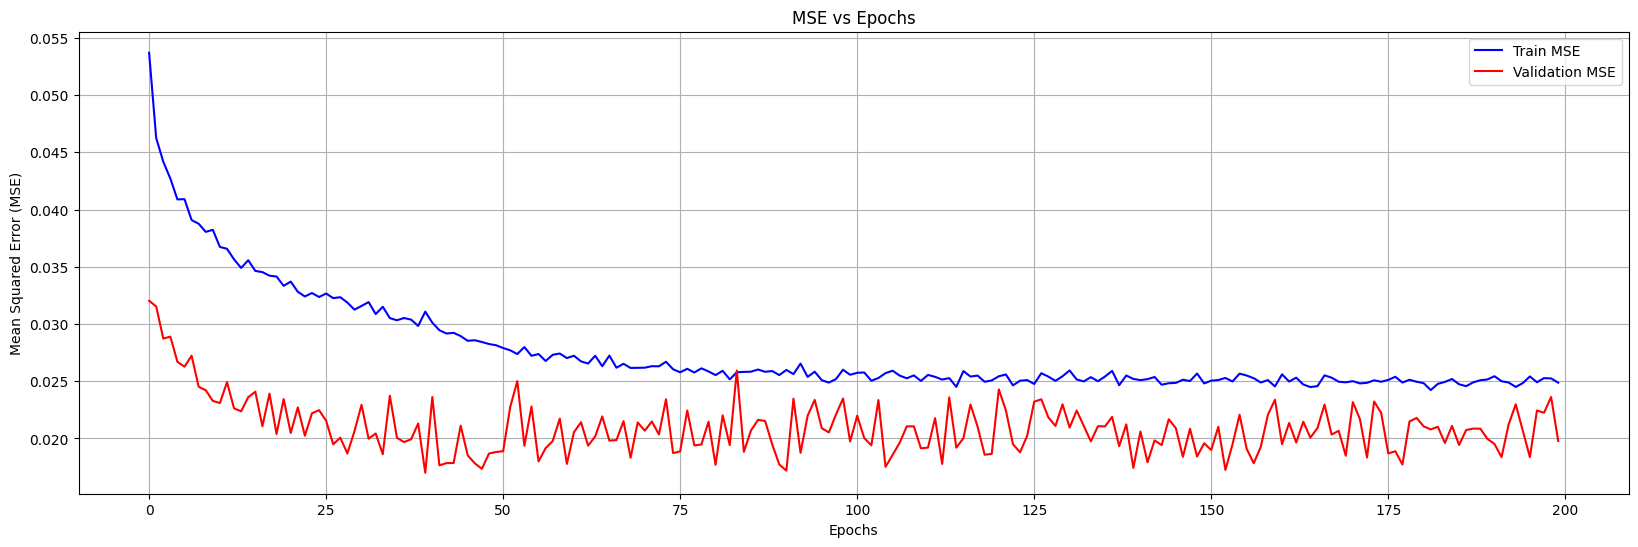

In [7]:
# 繪製MSE和epoch的關係圖
plt.figure(figsize=(20,6))
plt.plot(model_trained.history['loss'],label='Train MSE',color='b')
plt.plot(model_trained.history['val_loss'],label='Validation MSE',color='r')
plt.legend()
plt.title('MSE vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

使用mae驗證

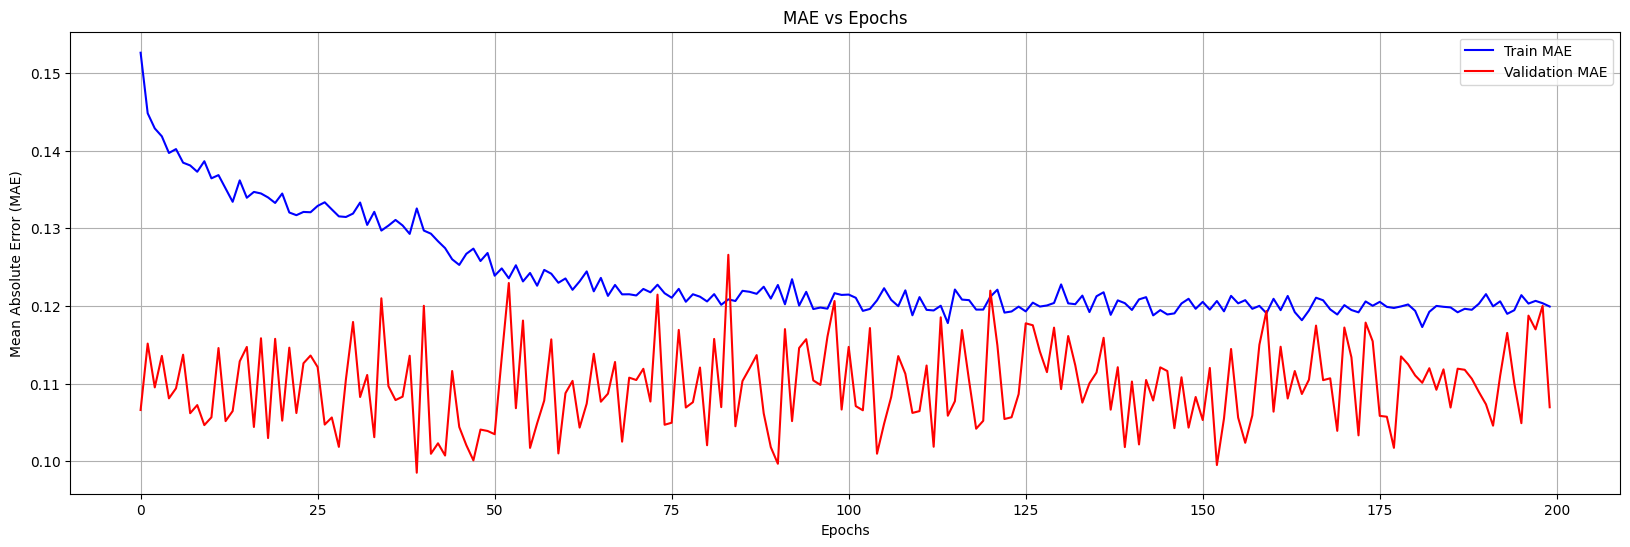

In [8]:
# 繪製mae和epoch的關係圖
plt.figure(figsize=(20,6))
plt.plot(model_trained.history['mae'],label='Train MAE',color='b')
plt.plot(model_trained.history['val_mae'],label='Validation MAE',color='r')
plt.legend()
plt.title('MAE vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.grid(True)
plt.show()